# Flu Season Start Analysis

In [112]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import model
import pickle
import itertools
import networkx as nx
from itertools import product
from tqdm import tqdm, tqdm_notebook
import os
%matplotlib inline

In [113]:
prep_data = model.data_and_network_prep()

In [111]:
vacc = prep_data['vaccination_data'].copy()

for s in model.seasons:
    
    total_cov = vacc[(vacc.vac_season==s)].shape[0]/250000

    cov_by_sep = vacc[(vacc.vac_season==s)&(vacc.vac_day_of_season<122)].shape[0]/250000

    cov_by_sep_percent = vacc[(vacc.vac_season==s)&(vacc.vac_day_of_season<122)].shape[0]/vacc[(vacc.vac_season==s)].shape[0]
    
    print(f'{s} season:')
    print(f'Coverage through September: {cov_by_sep*100:.1f}%')
    print(f'Cumulative season coverage: {total_cov*100:.1f}%')
    print(f'Coverage through September out of cumulative: {cov_by_sep_percent*100:.1f}%\n')


2011 season:
Coverage through September: 0.4%
Cumulative season coverage: 12.4%
Coverage through September out of cumulative: 3.1%

2012 season:
Coverage through September: 0.3%
Cumulative season coverage: 12.9%
Coverage through September out of cumulative: 2.6%

2013 season:
Coverage through September: 0.4%
Cumulative season coverage: 15.2%
Coverage through September out of cumulative: 2.4%

2014 season:
Coverage through September: 0.3%
Cumulative season coverage: 16.7%
Coverage through September out of cumulative: 2.0%

2015 season:
Coverage through September: 0.6%
Cumulative season coverage: 21.5%
Coverage through September out of cumulative: 2.9%

2016 season:
Coverage through September: 2.1%
Cumulative season coverage: 20.3%
Coverage through September out of cumulative: 10.4%

2017 season:
Coverage through September: 6.3%
Cumulative season coverage: 20.0%
Coverage through September out of cumulative: 31.4%



In [114]:
data_for_fit_i = model.create_data_for_fit_influenza()
data_for_fit_v = model.create_data_for_fit(prep_data)

### Load model results

In [131]:
# Get list of files
path = 'L:/Dor/Data/coupled_model/flu_season_start_date/new/vacc_start_early/'
file_names = os.listdir(path)

# low early
model_results_low_early = []
for file_name in file_names[6:]:
    with open(f'{path}/{file_name}', 'rb') as pickle_in:
        cur_res = pickle.load(pickle_in)
    model_results_low_early.extend(cur_res)
    
# high early
model_results_high_early = []
for file_name in file_names[:6]:
    with open(f'{path}/{file_name}', 'rb') as pickle_in:
        cur_res = pickle.load(pickle_in)
    model_results_high_early.extend(cur_res)
    
    
# Get list of files
path = 'L:/Dor/Data/coupled_model/flu_season_start_date/new/vacc_start_late/'
file_names = os.listdir(path)

# low late
model_results_low_late = []
for file_name in file_names[6:]:
    with open(f'{path}/{file_name}', 'rb') as pickle_in:
        cur_res = pickle.load(pickle_in)
    model_results_low_late.extend(cur_res)
    
# high late
model_results_high_late = []
for file_name in file_names[:6]:
    with open(f'{path}/{file_name}', 'rb') as pickle_in:
        cur_res = pickle.load(pickle_in)
    model_results_high_late.extend(cur_res)

In [132]:
len(model_results_low_early)

30

In [133]:
len(model_results_high_early)

30

In [134]:
len(model_results_low_late)

30

In [135]:
len(model_results_high_late)

30

### Get vaccination and flu peaks

In [137]:
### LOW EARLY ###
# Vccination peaks
vacc_peaks_low_early = 92 + np.array([np.argmax(np.array([len(s) for s in res['Iv']])) for res in model_results_low_early])

# Flu peaks
flu_peaks_low_early = np.array([np.argmax(np.array([len(s) for s in res['Is']])) for res in model_results_low_early])

# Calc differences
difs_low_early = flu_peaks_low_early - vacc_peaks_low_early

print('Vaccination start date: 1/9, Vaccination coverage: ~20%:')
print(f'Vaccination average peak: {vacc_peaks_low_early.mean():.0f} (day in season)')
print(f'Influenza average peak: {flu_peaks_low_early.mean():.0f} (day in season)')
print(f'Average difference: {difs_low_early.mean():.0f} days\n')


### HIGH EARLY ###
# Vccination peaks
vacc_peaks_high_early = 92 + np.array([np.argmax(np.array([len(s) for s in res['Iv']])) for res in model_results_high_early])

# Flu peaks
flu_peaks_high_early = np.array([np.argmax(np.array([len(s) for s in res['Is']])) for res in model_results_high_early])

# Calc differences
difs_high_early = flu_peaks_high_early - vacc_peaks_high_early

print('Vaccination start date: 1/9, Vaccination coverage: ~45%:')
print(f'Vaccination average peak: {vacc_peaks_high_early.mean():.0f} (day in season)')
print(f'Influenza average peak: {flu_peaks_high_early.mean():.0f} (day in season)')
print(f'Average difference: {difs_high_early.mean():.0f} days\n')


### LOW LATE ###
# Vccination peaks
vacc_peaks_low_late = 153 + np.array([np.argmax(np.array([len(s) for s in res['Iv']])) for res in model_results_low_late])

# Flu peaks
flu_peaks_low_late = np.array([np.argmax(np.array([len(s) for s in res['Is']])) for res in model_results_low_late])

# Calc differences
difs_low_late = flu_peaks_low_late - vacc_peaks_low_late

print('Vaccination start date: 1/11, Vaccination coverage: ~20%:')
print(f'Vaccination average peak: {vacc_peaks_low_late.mean():.0f} (day in season)')
print(f'Influenza average peak: {flu_peaks_low_late.mean():.0f} (day in season)')
print(f'Average difference: {difs_low_late.mean():.0f} days\n')


### HIGH LATE ###
# Vccination peaks
vacc_peaks_high_late = 153 + np.array([np.argmax(np.array([len(s) for s in res['Iv']])) for res in model_results_high_late])

# Flu peaks
flu_peaks_high_late = np.array([np.argmax(np.array([len(s) for s in res['Is']])) for res in model_results_high_late])

# Calc differences
difs_high_late = flu_peaks_high_late - vacc_peaks_high_late

print('Vaccination start date: 1/11, Vaccination coverage: ~45%:')
print(f'Vaccination average peak: {vacc_peaks_high_late.mean():.0f} (day in season)')
print(f'Influenza average peak: {flu_peaks_high_late.mean():.0f} (day in season)')
print(f'Average difference: {difs_high_late.mean():.0f} days\n')

Vaccination start date: 1/9, Vaccination coverage: ~20%:
Vaccination average peak: 153 (day in season)
Influenza average peak: 224 (day in season)
Average difference: 72 days

Vaccination start date: 1/9, Vaccination coverage: ~45%:
Vaccination average peak: 121 (day in season)
Influenza average peak: 251 (day in season)
Average difference: 130 days

Vaccination start date: 1/11, Vaccination coverage: ~20%:
Vaccination average peak: 216 (day in season)
Influenza average peak: 218 (day in season)
Average difference: 2 days

Vaccination start date: 1/11, Vaccination coverage: ~45%:
Vaccination average peak: 182 (day in season)
Influenza average peak: 211 (day in season)
Average difference: 29 days



In [77]:
### LOW EARLY ###
# Vccination peaks
vacc_peaks_low_early = 92 + np.array([np.argmax(np.array([len(s) for s in res['Iv']])) for res in model_results_low_early])

# Flu peaks
flu_peaks_low_early = np.array([np.argmax(np.array([len(s) for s in res['Is']])) for res in model_results_low_early])

# Calc differences
difs_low_early = flu_peaks_low_early - vacc_peaks_low_early

print('Vaccination start date: 1/9, Vaccination coverage: ~20%:')
print(f'Vaccination average peak: {vacc_peaks_low_early.mean():.0f} (day in season)')
print(f'Influenza average peak: {flu_peaks_low_early.mean():.0f} (day in season)')
print(f'Average difference: {difs_low_early.mean():.0f} days\n')


### HIGH EARLY ###
# Vccination peaks
vacc_peaks_high_early = 92 + np.array([np.argmax(np.array([len(s) for s in res['Iv']])) for res in model_results_high_early])

# Flu peaks
flu_peaks_high_early = np.array([np.argmax(np.array([len(s) for s in res['Is']])) for res in model_results_high_early])

# Calc differences
difs_high_early = flu_peaks_high_early - vacc_peaks_high_early

print('Vaccination start date: 1/9, Vaccination coverage: ~40%:')
print(f'Vaccination average peak: {vacc_peaks_high_early.mean():.0f} (day in season)')
print(f'Influenza average peak: {flu_peaks_high_early.mean():.0f} (day in season)')
print(f'Average difference: {difs_high_early.mean():.0f} days\n')


### LOW LATE ###
# Vccination peaks
vacc_peaks_low_late = 153 + np.array([np.argmax(np.array([len(s) for s in res['Iv']])) for res in model_results_low_late])

# Flu peaks
flu_peaks_low_late = np.array([np.argmax(np.array([len(s) for s in res['Is']])) for res in model_results_low_late])

# Calc differences
difs_low_late = flu_peaks_low_late - vacc_peaks_low_late

print('Vaccination start date: 1/11, Vaccination coverage: ~20%:')
print(f'Vaccination average peak: {vacc_peaks_low_late.mean():.0f} (day in season)')
print(f'Influenza average peak: {flu_peaks_low_late.mean():.0f} (day in season)')
print(f'Average difference: {difs_low_late.mean():.0f} days\n')


### HIGH LATE ###
# Vccination peaks
vacc_peaks_high_late = 153 + np.array([np.argmax(np.array([len(s) for s in res['Iv']])) for res in model_results_high_late])

# Flu peaks
flu_peaks_high_late = np.array([np.argmax(np.array([len(s) for s in res['Is']])) for res in model_results_high_late])

# Calc differences
difs_high_late = flu_peaks_high_late - vacc_peaks_high_late

print('Vaccination start date: 1/11, Vaccination coverage: ~40%:')
print(f'Vaccination average peak: {vacc_peaks_high_late.mean():.0f} (day in season)')
print(f'Influenza average peak: {flu_peaks_high_late.mean():.0f} (day in season)')
print(f'Average difference: {difs_high_late.mean():.0f} days\n')

Vaccination start date: 1/9, Vaccination coverage: ~20%:
Vaccination average peak: 153 (day in season)
Influenza average peak: 232 (day in season)
Average difference: 78 days

Vaccination start date: 1/9, Vaccination coverage: ~40%:
Vaccination average peak: 125 (day in season)
Influenza average peak: 247 (day in season)
Average difference: 122 days

Vaccination start date: 1/11, Vaccination coverage: ~20%:
Vaccination average peak: 213 (day in season)
Influenza average peak: 220 (day in season)
Average difference: 7 days

Vaccination start date: 1/11, Vaccination coverage: ~40%:
Vaccination average peak: 186 (day in season)
Influenza average peak: 212 (day in season)
Average difference: 27 days



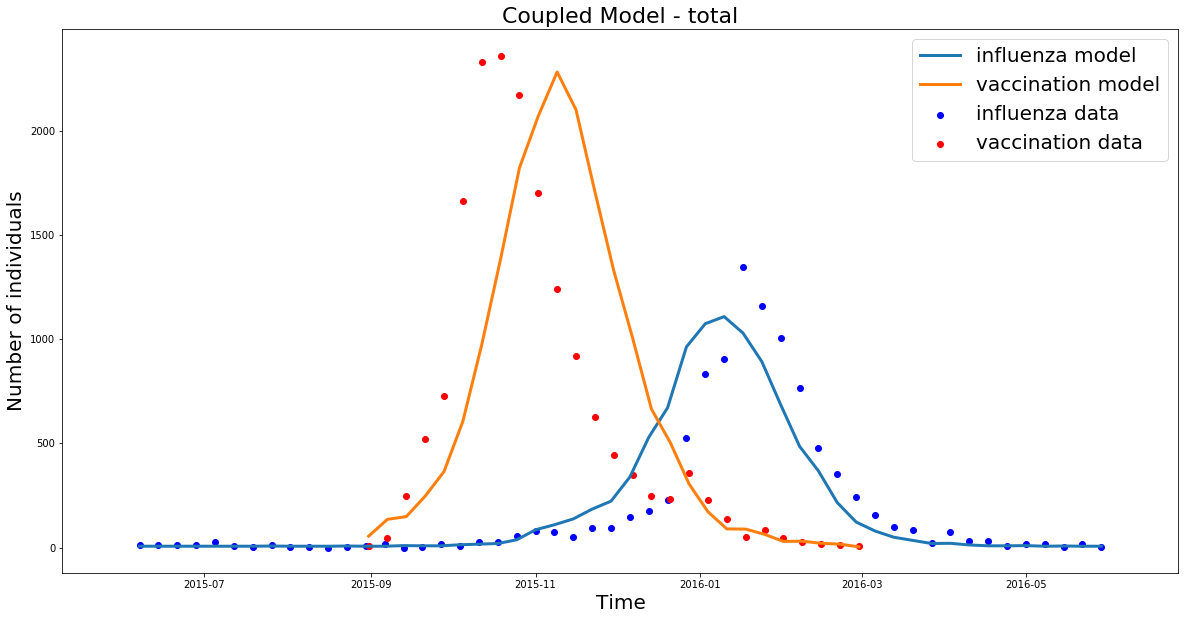

In [116]:
model.plot_aggregated_fit_coupled(model_results_low_early[0], data_for_fit_i, data_for_fit_v, 2016, prep_data)

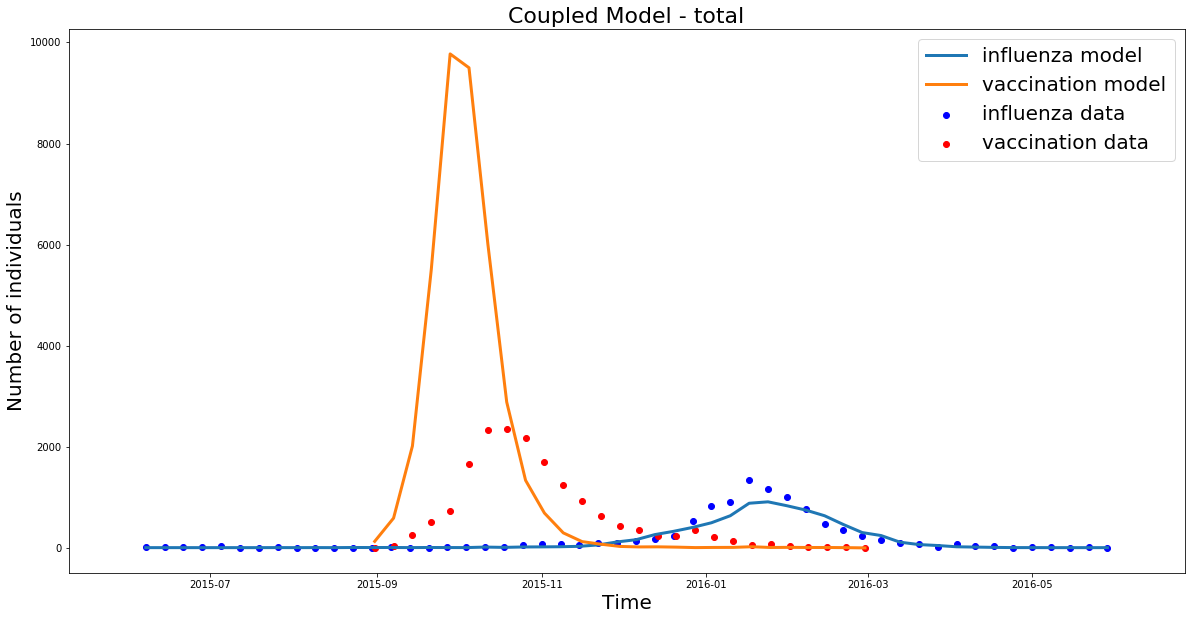

In [123]:
plot_aggregated_fit_coupled(model_results_high_early[0], data_for_fit_i, data_for_fit_v, 2016, prep_data)

In [122]:
get_model_weekly_cases = model.get_model_weekly_cases
get_coupled_model_weekly_vacc = model.get_coupled_model_weekly_vacc

def plot_aggregated_fit_coupled(model_results, data_for_fit_i, data_for_fit_v, season, prep_data, age=None, vacc_start=92):
    # Influenza model
    # Get season length
    short = len(model_results['new_Is']) < 366

    # Get data to plot and model results
    # If children
    if age == 0:
        infected_data_for_plot = data_for_fit_i['by_age' if not short else 'short_by_age'][0]
        model_weekly_cases = get_model_weekly_cases(model_results, season, short=short, age=0)
    # If adult
    elif age == 1:
        infected_data_for_plot = data_for_fit_i['by_age' if not short else 'short_by_age'][1]
        model_weekly_cases = get_model_weekly_cases(model_results, season, short=short, age=1)
    # If total
    else:
        infected_data_for_plot = data_for_fit_i['total' if not short else 'short_total']
        model_weekly_cases = get_model_weekly_cases(model_results, season, short=short)

    # Get only relevant season form the data
    infected_data_for_plot = infected_data_for_plot[infected_data_for_plot.season == season]

    fig = plt.figure(figsize=(20, 10))
    plt.scatter(infected_data_for_plot.index, infected_data_for_plot.cases, c='b', label='influenza data')
    plt.plot(model_weekly_cases.index, model_weekly_cases.cases, linewidth=3, label='influenza model')

    # Vaccination model
    # Get data to plot and model results
    # If children
    if age == 0:
        vacc_data_for_plot = data_for_fit_v['infected_data_agg_children']
        model_weekly_vacc = get_coupled_model_weekly_vacc(model_results, prep_data, age=age)
    # If adult
    elif age == 1:
        vacc_data_for_plot = data_for_fit_v['infected_data_agg_adult']
        model_weekly_vacc = get_coupled_model_weekly_vacc(model_results, prep_data, age=age)
    # If total
    else:
        vacc_data_for_plot = data_for_fit_v['infected_data_agg']
        model_weekly_vacc = get_coupled_model_weekly_vacc(model_results, prep_data)

    # Time steps
    # Get vaccination season start date
    start_date = pd.Timestamp(season - 1, 6, 1) + pd.Timedelta(days=vacc_start - 1)
    # Get the season range - form start date
    dates = [start_date + pd.Timedelta(days=7) * i for i in range(27)]

    # Plot vaccinated
    plt.scatter(dates, vacc_data_for_plot.vacc_count, c='r', label='vaccination data')
    plt.plot(dates, model_weekly_vacc, linewidth=3, label='vaccination model')

    plt.title(f'Coupled Model - {"total" if age is None else ["children", "adults"][age]}', size=22)
    plt.xlabel('Time', size=20)
    plt.ylabel('Number of individuals', size=20)

    plt.legend(fontsize=20)

    plt.show()